# Machine Learning Project

VITAL Benoit, VANDENBERGHE Candice, QUERRY Siloé MMN5

This notebook presents an exploratory analysis of the NIST viscosity dataset, which contains thermophysical data for various molten salts and inorganic systems. Each entry describes a specific mixture or compound, along with the temperature range over which its viscosity has been experimentally modeled.
Then we explore different machine learning models to predict the viscosity. Optimizing and ameliorating them.

### Part 1 Preparation

In [5]:
import pandas as pd

df = pd.read_csv("viscosity-csv.txt")
print(df.head())


        Salt Composition range Data type  T min (K)  T max (K) Uncertainty  \
0       AgBr               100        +E      713.0      873.0        1.5%   
1  AgBr-AgCl         0.0-100.0        +E      730.0      970.0         NaN   
2  AgBr-AgCl         26.8-73.2        +E      720.0      870.0         NaN   
3  AgBr-AgCl             40-60        +E      720.0      870.0         NaN   
4  AgBr-AgCl             60-40        +E      720.0      870.0         NaN   

    Data 1    Data 2  Data 3  Data 4  Data 5  \
0  0.38060  12920.41     NaN     NaN     NaN   
1  0.31776  12027.11     NaN     NaN     NaN   
2  0.30267  12742.17     NaN     NaN     NaN   
3  0.22062  15031.69     NaN     NaN     NaN   
4  0.31178  13358.06     NaN     NaN     NaN   

                                             Comment Formatting comment  
0                                                NaN                NaN  
1  For 100% AgCl, the departures from the recomme...                NaN  
2                   

we import our dataset "viscosity-csv.txt", next we will get some info on it.

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1414 entries, 0 to 1413
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Salt                1414 non-null   object 
 1   Composition range   1414 non-null   object 
 2   Data type           1414 non-null   object 
 3   T min (K)           1343 non-null   float64
 4   T max (K)           1325 non-null   float64
 5   Uncertainty         128 non-null    object 
 6   Data 1              1414 non-null   float64
 7   Data 2              1414 non-null   object 
 8   Data 3              35 non-null     float64
 9   Data 4              14 non-null     float64
 10  Data 5              5 non-null      float64
 11  Comment             266 non-null    object 
 12  Formatting comment  7 non-null      object 
dtypes: float64(6), object(7)
memory usage: 143.7+ KB
None


In [9]:
print(df.dtypes)

Salt                   object
Composition range      object
Data type              object
T min (K)             float64
T max (K)             float64
Uncertainty            object
Data 1                float64
Data 2                 object
Data 3                float64
Data 4                float64
Data 5                float64
Comment                object
Formatting comment     object
dtype: object


Data 2 is a problem for our implementation, it should be a float, we will try to understand why and correct it.

In [11]:
#we try to see why data 2 is not numerical:

for index, value in df['Data 2'].items():
    try:
        float(value)
    except:
        print(index, value)

30 498K
85 498.2K
99 498.2K
120 353.2K
205 1773K
206 1773K
207 1673K
208 1673K
209 1873K
210 1773K
212 1873K
213 1873K
214 1873K
232 583K
243 513K
292 1073.2K
335 873K
336 873K
425 1873K
426 1873K
427 1873K
428 1873K
429 1873K
430 1873K
431 1873K
437 1570K
476 793K
477 793K
478 793K
483 733K
484 733K
485 733K
510 793K
522 793K
523 793K
693 531.2K
750 791K
751 791K
757 1173K
758 1173K
759 1173K
760 1173K
864 1173K
930 1111K
931 1111K
1056 1173K
1067 1073.2K
1113 1073K
1114 1073K
1168 1173K
1210 1173K
1211 1173K
1212 1173K
1213 1173K
1214 1173K
1217 1073.2K
1224 1073.2K
1235 503.2K
1243 773K
1246 653K
1256 1173K
1257 1173K
1258 1173K
1259 1173K
1260 1173K
1261 1173K
1262 1173K
1263 1173K
1264 1173K
1265 1173K
1266 1173K


Some values have a non numerical value that cannot be converted to a float so we have to remove it.

In [16]:
#annexe : we did this afterwards so we already implement the +E criteria, as it is important for the rest of the project
mask = df['Data 2'].astype(str).str.contains('K') & (df['Data type'] == '+E')
result=df[mask]
print(result[['Data type','Data 2']])

Empty DataFrame
Columns: [Data type, Data 2]
Index: []


In [18]:
#this code will remove the problematic 'K'

df['Data 2'] = df['Data 2'].astype(str).str.replace('K', '', regex=False)

# Remove extra spaces
df['Data 2'] = df['Data 2'].str.strip()

# Convert to float
df['Data 2'] = pd.to_numeric(df['Data 2'], errors='coerce')

print(df['Data 2'].dtype)
df['Data 2'].count()


float64


1414

In [19]:
#statistiques descriptives
# Statistiques sur les colonnes numériques
print(df.describe())

         T min (K)    T max (K)         Data 1         Data 2        Data 3  \
count  1343.000000  1325.000000    1414.000000    1414.000000  3.500000e+01   
mean    812.864110   945.001208     423.649739   33543.359908  8.413790e+04   
std     315.016597   357.317810    7693.567190   40467.687973  3.464064e+05   
min     273.000000   333.000000   -4220.100000    -345.570000 -2.364900e+00   
25%     550.000000   680.000000       0.025485   17284.500000 -1.731700e-04   
50%     770.000000   970.000000       0.081664   23553.320000  1.687000e-03   
75%    1023.000000  1173.000000       0.169190   33759.800000  3.070000e+02   
max    2208.000000  2595.000000  206673.000000  635856.470000  1.471000e+06   

             Data 4        Data 5  
count  1.400000e+01  5.000000e+00  
mean  -1.053235e-03  3.121517e-05  
std    7.116565e-03  6.983511e-05  
min   -2.397300e-02 -4.224000e-08  
25%   -2.297000e-05 -2.846000e-08  
50%    1.275500e-07 -1.613000e-09  
75%    5.030000e-06  8.148000e-09  


In [22]:
print(list(df.columns)) #avoir nom des colonnes

['Salt', 'Composition range', 'Data type', 'T min (K)', 'T max (K)', 'Uncertainty', 'Data 1', 'Data 2', 'Data 3', 'Data 4', 'Data 5', 'Comment', 'Formatting comment']


### Data column definitions

(Salt) -- Formula of salt or salt mixture

(Composition range) -- Range of compositions for which the data applies

(Data type) -- A string indicating the type of data in the row

(T min) -- Lower end of temperature range in Kelvin

(T max) -- Upper end of temperature range in Kelvin, may not be present if the data applies to a single temperature.

(Uncertainty) -- Uncertainty (+/-) where available.

(Data 1) -- Interpretation of this column depends on the (Data type) value. See explaination below.

(Data 2) -- Interpretation of this column depends on the (Data type) value. See explaination below.

(Data 3) -- Interpretation of this column depends on the (Data type) value. See explanation below.

(Data 4) -- Intepretation of this column depends on the (Data type) value. See explanation below.

(Data 5) -- Intepretation of this column depends on the (Data type) value. See explanation below.

(Comment) -- Optional comment text regarding the data; may supply uncertainty information

(Formatting comment) -- Optional comment text disclosing a likely error in the data which was discovered when the data were reformatted.


The contents of the (Data 1) through (Data 5) columns depend on the data type:


Data type DP:  viscosity, v (mN * s / m^2) = (Data 1) at T = (Data 2) (K     The (Data 3), (Data 4), and (Data 5) columns should be em      The (T max) and (T min) columns should be empty.


Data type +E:  viscosity, v (mN * s / m^2) = (Data 1) * exp((Data R * T))2) / (

        T is temperature n.
        R is the gas constant, 8.31441 J K).
        The (Data 3), (Data 4), and (Data 5) columns should be empty.


Data type E1:  viscosity, v (mN * s / m^2) = (Data 1) * exp(((Data 2) / (R * T)) + ((D T^2))

        T is tempen Kelvin.
        R is the gas constant, 8.3(mol * K).
        The (Data 4), and (Data 5) columns should be empty.


Data type E2:  viscosity, v (mN * s / m^2) =  (Data 1) * exp((Data 2) / - (Data 3))))

        T iature in Kelvin.
        R is the gas consta441 J /(mol * K).
        The (Data 4), and (Data 5) columns should be empty.


Data type I1:  viscosity, v (mN * s / m^2ta 1) + (Data 2) * C

        C is the mole percent composition of the component noted in the (Composition range) column. The number should be a percentage (m = 100) not a fraction.
        The (Data 3), (Data 4), and (columns should be empty.
        The (T max) column should be empty.


Data type I2:  viscosity, v (mN * s / m^2) = (Dataata 2) * C + (Data 3) * C^2

        C is the mole percent composition of the component noted in the (Composition range) column. The number should be a percenx value = 100) not a fraction.
        The (Data 4), and (Data 5) columns should be empty.


Data type I3:  viscosity, v (mN * s / m^2) = (Data 1) + (Data+ (Data 3) * C^2 + (Data 4) * C^3

        C is the mole percent composition of the component noted in the (Composition range) column. The number should be a ge (max value = 100) not a fraction.
 The (Data 5) column should be empty.
        The (T max) column should be empty.


Data type I4:  viscosity, v (mN * s / m^2) = (Data 1) + (Data 2) * C +  * C^2 + (Data 4) * C^3 + (Data 5) * C^4

        C is the mole percent composition of the component noted in the (Composition range) column. The number shoulercentage (max value = 100) not a fraction.
        The (T max) column should be empty.


Data type P2:  viscosity, v (mN^2) = (Data 1) + (Data 2) * a 3) * T^2

        T is temperature in Kelvin.
        The (Data 4), and (Data 5) columns should be empty.


Data type P3:  viscosity, v (mN * s / m^2) 1) + (Data 2) * T + (Data 3+ (Data 4) * T^3

        T is temprature in Kelvin.
        The (Data 5) column should be empty.
"


In [25]:
df.isnull().sum() 

Salt                     0
Composition range        0
Data type                0
T min (K)               71
T max (K)               89
Uncertainty           1286
Data 1                   0
Data 2                   0
Data 3                1379
Data 4                1400
Data 5                1409
Comment               1148
Formatting comment    1407
dtype: int64

We see that we have a lot of null values for Data 3, Data 4 and Data 5.

In [28]:
print(df["Data type"].unique()) 

['+E' 'DP' 'P2' 'I2' 'E1' 'P3' 'I1' 'I3' 'I4' 'E2']


In [30]:
# Compute average temperature
df["T average"] = (df["T min (K)"] + df["T max (K)"]) / 2
print(df["T average"])

0       793.0
1       850.0
2       795.0
3       795.0
4       795.0
        ...  
1409    745.0
1410    609.5
1411    675.0
1412    787.5
1413    735.0
Name: T average, Length: 1414, dtype: float64


In [32]:
# Convert temperature to numeric
df["T min (K)"] = pd.to_numeric(df["T min (K)"], errors='coerce')
df["T max (K)"] = pd.to_numeric(df["T max (K)"], errors='coerce')

The point of this part was to understand/get to know our dataset and put it in a usable form for the rest of our projet. We created T average which we will use later.

### Visualization

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

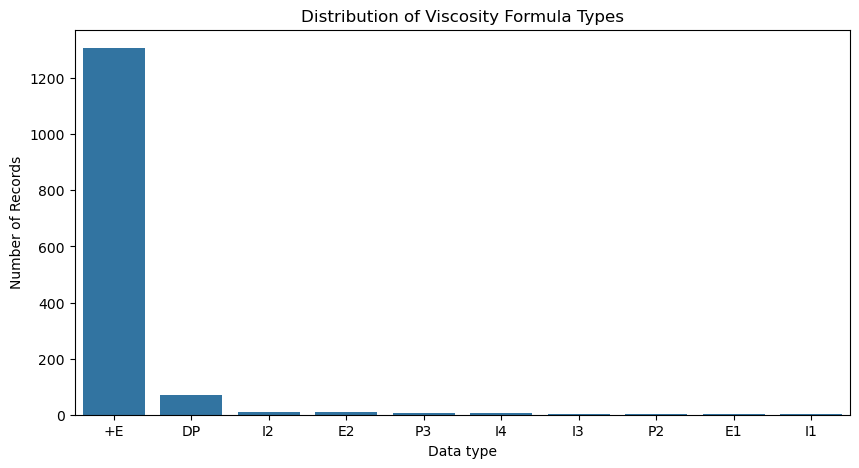

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x="Data type", order=df["Data type"].value_counts().index)
plt.title("Distribution of Viscosity Formula Types")
plt.xlabel("Data type")
plt.ylabel("Number of Records")
plt.show()

This chart shows how many samples belong to each viscosity formula type (+E, DP, P2, I2, etc.).
The +E type usually dominates : it corresponds to an empirical exponential relationship between viscosity and temperature.
Other types (P, I, E, etc.) represent polynomial or integrated models, used less frequently.

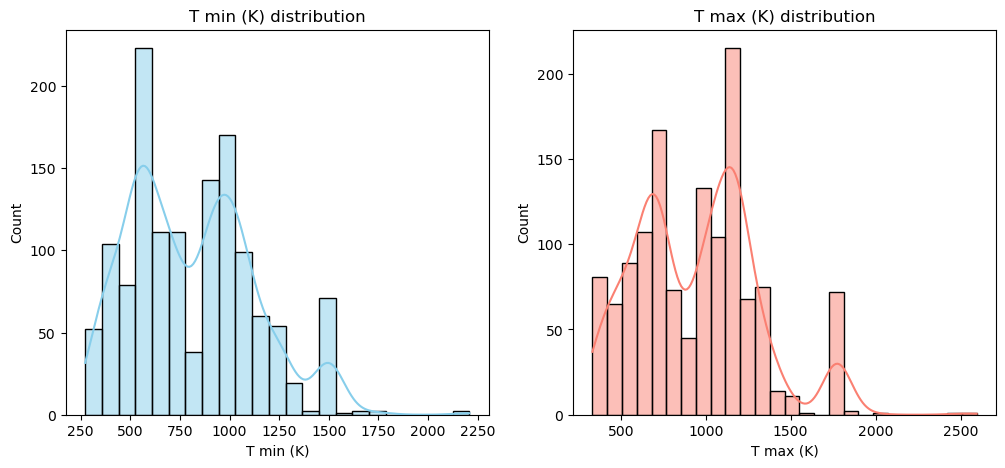

In [39]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

sns.histplot(df["T min (K)"], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title("T min (K) distribution")

sns.histplot(df["T max (K)"], kde=True, ax=axes[1], color='salmon')
axes[1].set_title("T max (K) distribution")

plt.show()

These histograms display the experimental temperature ranges across all entries.
You’ll often see concentrations around 500–1300 K, which is typical for molten salts.
A wider distribution indicates that the dataset includes diverse chemical systems, from low-melting salts to high-temperature oxides or fluorides.

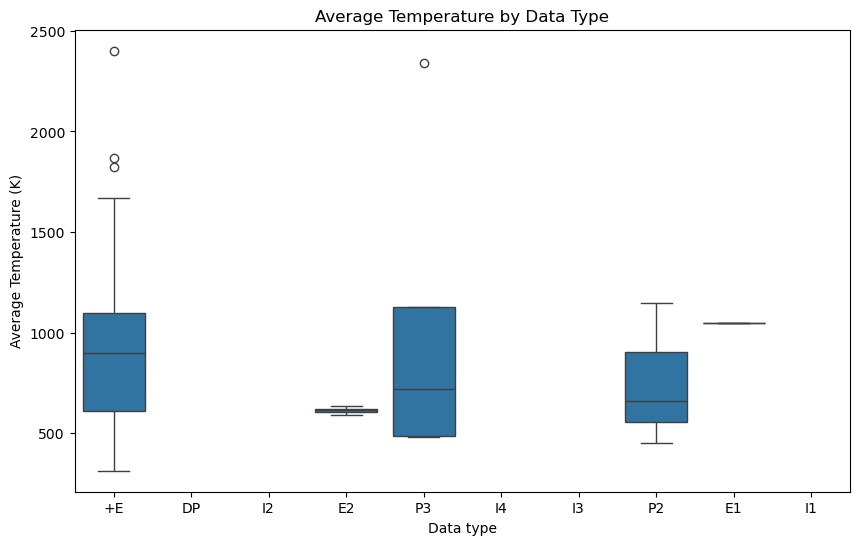

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Data type", y="T average", order=df["Data type"].value_counts().index)
plt.title("Average Temperature by Data Type")
plt.xlabel("Data type")
plt.ylabel("Average Temperature (K)")
plt.show()


This boxplot compares the average working temperature of each formula type.
The +E models typically cover higher and broader temperature ranges, since they’re used for many molten systems.
Other types (P, I) are often fitted to narrower ranges.
Outliers reflect extreme conditions for instance, very high-temperature systems like oxides or sulfides.

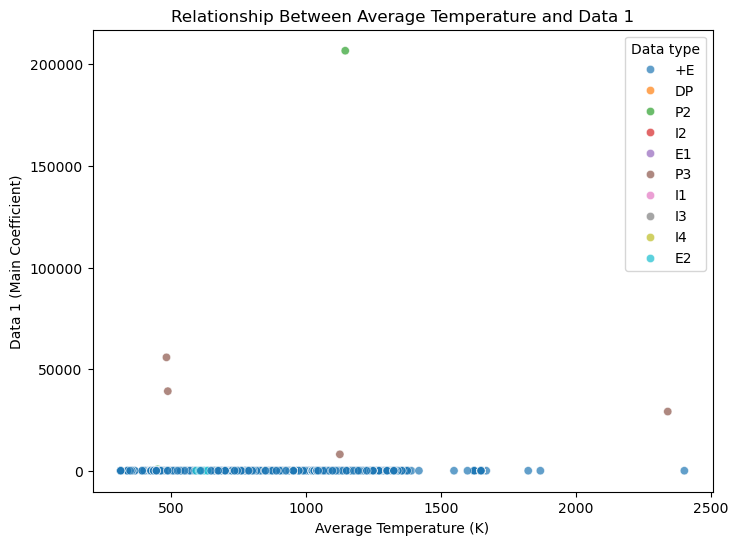

In [43]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="T average", y="Data 1", hue="Data type", alpha=0.7)
plt.title("Relationship Between Average Temperature and Data 1")
plt.xlabel("Average Temperature (K)")
plt.ylabel("Data 1 (Main Coefficient)")
plt.legend(title="Data type")
plt.show()



This scatter plot explores how the main viscosity coefficient (Data 1) varies with temperature. Typically:

Data 1 decreases as temperature increases → viscosity lowers at higher temperatures.

The large spread shows how different salts have unique viscosity constants.

The colors (by Data type) highlight whether some formula families show distinct trends.

C:\Users\33783\AppData\Local\Temp\ipykernel_61800\2803344374.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_salts.values, y=top_salts.index, palette="viridis")


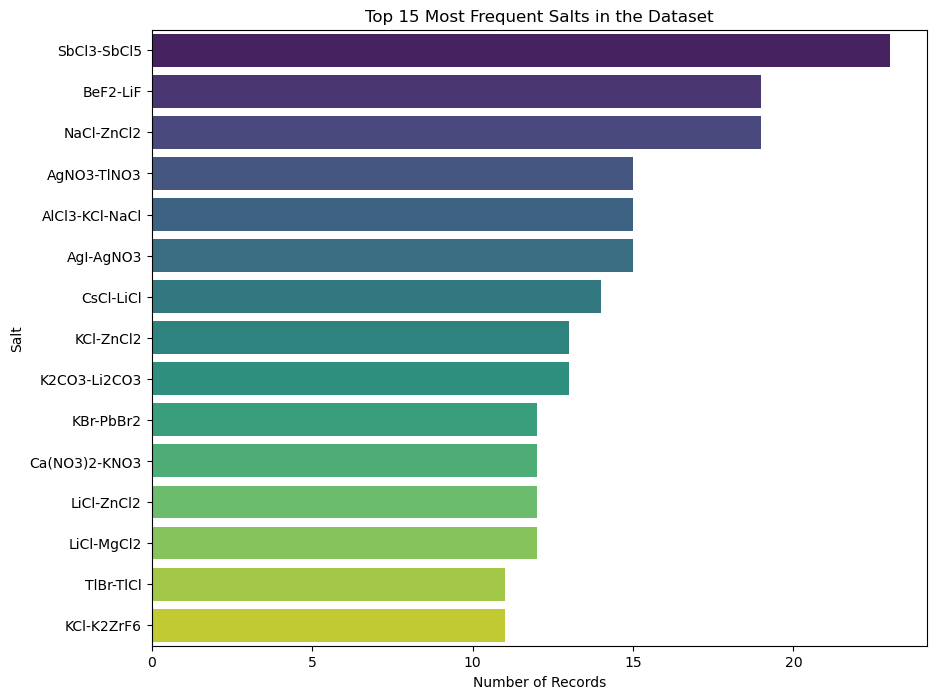

In [45]:
plt.figure(figsize=(10,8))
top_salts = df["Salt"].value_counts().head(15)
sns.barplot(x=top_salts.values, y=top_salts.index, palette="viridis")
plt.title("Top 15 Most Frequent Salts in the Dataset")
plt.xlabel("Number of Records")
plt.ylabel("Salt")
plt.show()

This bar chart ranks the most frequently studied salts. You’ll often find common molten compounds like NaCl, KCl, LiF, CaCl₂, etc. These dominate because they’re well-studied, experimentally accessible, and often used as reference systems for viscosity modeling.

C:\Users\33783\AppData\Local\Temp\ipykernel_61800\642032591.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x="Data type", y="T average", palette="coolwarm", inner="quartile")


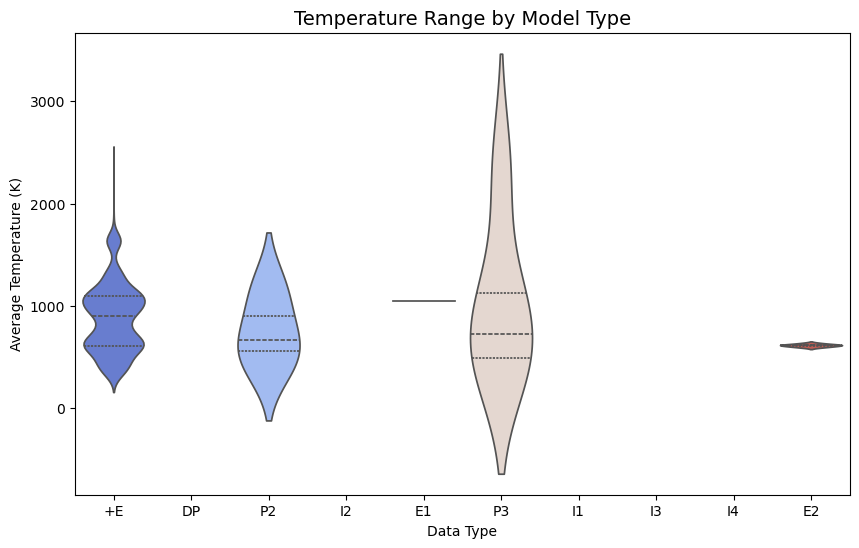

In [48]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x="Data type", y="T average", palette="coolwarm", inner="quartile")
plt.title("Temperature Range by Model Type", fontsize=14)
plt.xlabel("Data Type")
plt.ylabel("Average Temperature (K)")
plt.show()

The violin plot combines a boxplot and density shape, showing temperature distributions per data type. The +E type spans a broader temperature spectrum, confirming its flexibility across different molten systems. Other types have narrower and more symmetric distributions, suggesting they’re used in specific conditions.

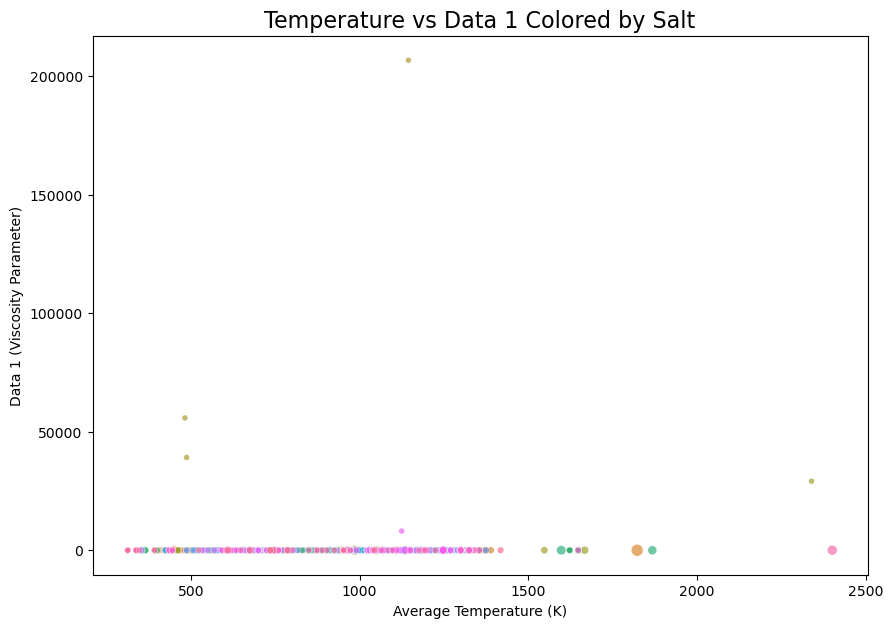

In [51]:
plt.figure(figsize=(10,7))
sns.scatterplot(
    data=df, x="T average", y="Data 1", 
    hue="Salt", size="Data 2", alpha=0.7, legend=False
)
plt.title("Temperature vs Data 1 Colored by Salt", fontsize=16)
plt.xlabel("Average Temperature (K)")
plt.ylabel("Data 1 (Viscosity Parameter)")
plt.show()


Each bubble represents a data record. Its size reflects the magnitude of Data 1, and the color indicates the model type. You’ll likely observe that Data 1 values tend to decrease with increasing temperature — reflecting lower viscosity at higher temperatures. Large bubbles at low T may represent systems with high viscosity constants.

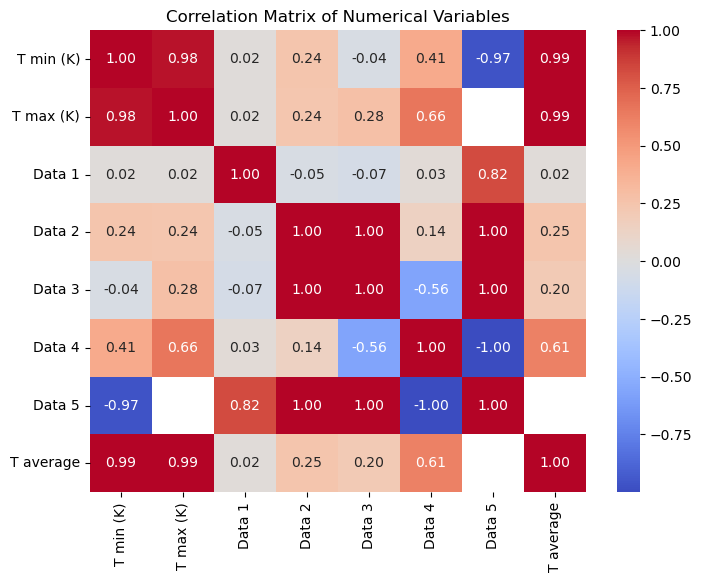

In [53]:
plt.figure(figsize=(8,6))
num_df = df.select_dtypes(include=['float', 'int'])
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


This correlation matrix reveals that the temperature variables (Tmin, Tmax and Taverage are perfectly correlated, theerefore we will only retain T average.

Data 2 to Data 5 show correlation of 1 and -1, we should not use all of them and choose carefully if we want to use one.

Data 1 is trustworthy and we will use it.


In [56]:
#we inspect data 2 to verify that it is useable in our model.

print(df['Data 2'].describe())
print(df['Data 2'].nunique())
print(df['Data 2'].isna().mean())


count      1414.000000
mean      33543.359908
std       40467.687973
min        -345.570000
25%       17284.500000
50%       23553.320000
75%       33759.800000
max      635856.470000
Name: Data 2, dtype: float64
1252
0.0


Data 2 is numeric, contains nos NaN, has many unique values. Therefore it is safe and important to include in our model.

### Imbalance study in our dataset

In [61]:
# Compute imbalance ratio
imbalance_ratio = df["Data type"].value_counts(normalize=True) * 100
print("\nPercentage representation of each Data type:\n")
print(imbalance_ratio.round(2))


Percentage representation of each Data type:

Data type
+E    92.43
DP     5.02
I2     0.57
E2     0.57
P3     0.35
I4     0.35
I3     0.28
P2     0.21
E1     0.14
I1     0.07
Name: proportion, dtype: float64


The vast majority of entries are labeled +E.

Only a very small fraction belong to other categories like DP, P2, P3, I1, I2, I3, I4, E1, E2.
This means our dataset is highly imbalanced, with one dominant class (+E) and several rare ones.
+E represents roughly 90 to 95% of all entries. Each other class (DP, I2, etc.) makes up less than 5%, often below 1%.

Implications :

Predictive bias: Any machine learning model trained on this data would tend to predict +E for most samples.
Underrepresentation: Rare viscosity models (DP, I2, etc.) may not have enough samples for statistical reliability.
Evaluation distortion: Accuracy alone would be misleading : metrics like precision, recall, and F1-score per class or macro-averaged F1 would be more appropriate.

### Implementation

we want to predict viscosity from composition and temperature. If you can reconstruct viscosity equations (especially for +E types, which use an Arrhenius-type law), we could:
- Compute viscosity values at specific temperatures,
- Then train a model to predict viscosity given. goal : Run a simple linear regression between the raw viscosity η and the raw average temperature 

### +E Data Type's Salt Study

In this section, we filter our dataset to retain only the +E data type. We analyze the missing values to understand which are reliable, and can be used in our model.

In [69]:
df_E = df[df["Data type"] == "+E"]
df_E = df_E.copy() #we made a copy to be able to modify and to add new column to this mask 

In [71]:
print(df_E["Data type"].unique())

['+E']


In [72]:
print("\nmissing values per column:")
na_counts = df_E.isnull().sum().sort_values(ascending=False)
display(na_counts)
df_E.shape


missing values per column:


Data 3                1307
Data 4                1307
Data 5                1307
Formatting comment    1302
Uncertainty           1190
Comment               1074
Salt                     0
Composition range        0
Data type                0
T min (K)                0
T max (K)                0
Data 1                   0
Data 2                   0
T average                0
dtype: int64

(1307, 14)

We understand that we should keep the temperature, Data 1 and Data 2 and that the others should be abandoned. It validates what we saw before.

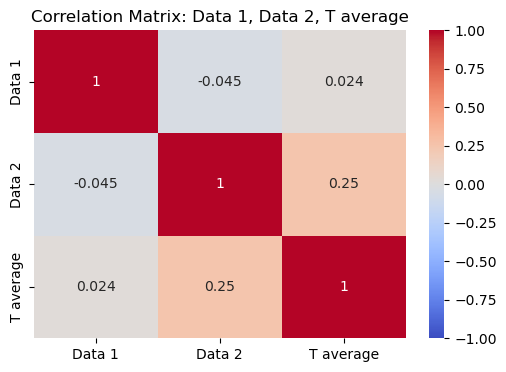

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_df = df[['Data 1', 'Data 2', 'T average']]

corr_matrix = corr_df.corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix: Data 1, Data 2, T average")
plt.show()


The correlation matrix shows that Data 1 and Data 2 have independant information and have a very weak correlation, and they also have minimal correlation with temperature. They are not redundant and all are well suited for our model.

### We compute classical viscosity (by application law arhenus and we add it to our dataset)

In [83]:
#viscosity function
R = 8.314462618  # J/mol/K

def viscosity(T, DATA1, DATA2):
    return DATA1 * np.exp(DATA2 / (R * T))


In [84]:
# dtype verification T, DATA1, DATA2
print(df_E["T average"].dtype)
print(df_E["Data 1"].dtype)
print(df_E["Data 2"].dtype)

float64
float64
float64


In [85]:
# convertion type Data 2 to float
DATA1 = df_E["Data 1"]
DATA2 = df_E["Data 2"]

In [87]:
import numpy as np
df_E["viscosity"] = viscosity(df_E["T average"],DATA1, DATA2)

In [88]:
print(df_E.columns)

Index(['Salt', 'Composition range', 'Data type', 'T min (K)', 'T max (K)',
       'Uncertainty', 'Data 1', 'Data 2', 'Data 3', 'Data 4', 'Data 5',
       'Comment', 'Formatting comment', 'T average', 'viscosity'],
      dtype='object')


In [89]:
df_E.to_csv("df_E(1).csv", index=False)

In this section, we reconstruct the viscosity using the Arrhenius equation (based on Data 1 and 2).
This generates a theoretical viscosity column that we use to validate the parameters and provide a physics based baseline to compare with our predictions.

### Baseline

### Arrhenius Baseline Analysis and salt level diagnosis

In [99]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

Global arrhenius baseline

Before training machine-learning models, we begin by analyzing the thermodynamic structure of the dataset using the Arrhenius formulation of viscosity. The Arrhenius transform, ln(η) vs 1/T, is a classical physical model for molten salts and allows us to evaluate whether each salt behaves consistently with expected viscosity–temperature trends.

We first fit a global Arrhenius regression, then perform individual regressions for each salt to measure the slope, intercept, and goodness of fit (R²). This enables us to identify physically reliable (“robust”) salts based on simple criteria (R² not null, positive slope, sufficient data). Finally, we visualize an example of an excellent Arrhenius fit to confirm the linearity assumption. The machine-learning dataset will be constructed only from these robust salts

In [102]:
df = pd.read_csv('df_E.csv')

# Create the transformed variables
# Viscosity is the dependent variable (y)
df['ln_viscosity'] = np.log(df['viscosity'])

# The inverse of the average temperature is the independent variable (X)
df['inv_T_average'] = 1 / df['T average']

# 3. Prepare the data for the model
X_arrhenius = df[['inv_T_average']]
y_arrhenius = df['ln_viscosity']

# 4. Train the model
model_arrhenius = LinearRegression()
model_arrhenius.fit(X_arrhenius, y_arrhenius)

# 5. Prediction and R² calculation
y_pred_arrhenius = model_arrhenius.predict(X_arrhenius)
r_squared_arrhenius = r2_score(y_arrhenius, y_pred_arrhenius)

print("### Linear Regression Result (Arrhenius Model):")
print(f"Dependent variable: ln(viscosity)")
print(f"Independent variable: 1 / T average")
print("\n--- Model Coefficients ---")
print(f"Slope (B): {model_arrhenius.coef_[0]:.4f}")
print(f"Intercept (A): {model_arrhenius.intercept_:.4f}")
print(f"\nCoefficient of Determination (R²): {r_squared_arrhenius:.4f}")


### Linear Regression Result (Arrhenius Model):
Dependent variable: ln(viscosity)
Independent variable: 1 / T average

--- Model Coefficients ---
Slope (B): -6.4611
Intercept (A): 1.7533

Coefficient of Determination (R²): 0.0000


Per salt arrhenius regressions

In [105]:
# Initialize a dataframe to stock the results ( coef A, B and R2)
results = []

# Group the data by 'Salt'
grouped_salts = df.groupby('Salt')

# Go through each group of salt
for salt_name, group in grouped_salts:
    
    # verification of number of points
    num_points = len(group)
    if num_points < 2:
        # we cannot do a regression with less than 2 points
        results.append({
            'Salt': salt_name,
            'Points': num_points,
            'A (Intercept)': np.nan,
            'B (Slope)': np.nan,
            'R2': np.nan,
            'Status': 'Insufficient data (n<2)'
        })
        continue

    try:
        # preparation of the data for regression
        X = group[['inv_T_average']]
        y = group['ln_viscosity']

        # training the model
        model = LinearRegression()
        model.fit(X, y)

        # calculation of R²
        y_pred = model.predict(X)
        r_squared = r2_score(y, y_pred)
        
        # keep the results
        results.append({
            'Salt': salt_name,
            'Points': num_points,
            'A (Intercept)': model.intercept_,
            'B (Slope)': model.coef_[0],
            'R2': r_squared,
            'Status': 'Success'
        })
    except Exception as e:
        results.append({
            'Salt': salt_name,
            'Points': num_points,
            'A (Intercept)': np.nan,
            'B (Slope)': np.nan,
            'R2': np.nan,
            'Status': f'Error: {e}'
        })

# put the results as a dataframe
df_results = pd.DataFrame(results)

print("### Part of the results of the modelisation by salt (arrhenius model)")
print(df_results.head(10))

print(f"\nTotal number of salts : {len(df_results)}")
print(f"Number of succes models (R² computed) : {df_results['R2'].notna().sum()}")

### Part of the results of the modelisation by salt (arrhenius model)
         Salt  Points  A (Intercept)    B (Slope)        R2  \
0        AgBr       1            NaN          NaN       NaN   
1   AgBr-AgCl       6      -3.694927  3612.726339  0.619568   
2  AgBr-HgBr2       5       1.288470  -320.304246  0.000000   
3    AgBr-KBr       5      -1.837787  2125.116499  0.726774   
4        AgCl       1            NaN          NaN       NaN   
5    AgCl-KCl       5      -1.632184  1839.188181  0.979243   
6  AgCl-PbCl2       6       1.331851  -381.171967  0.007402   
7         AgI       1            NaN          NaN       NaN   
8   AgI-AgNO3      13      -5.043761  3332.701237  0.651253   
9    AgI-HgI2       5       0.637950    46.543783  0.000130   

                    Status  
0  Insufficient data (n<2)  
1                  Success  
2                  Success  
3                  Success  
4  Insufficient data (n<2)  
5                  Success  
6                  Success  
7  I

We performed an Arrhenius regression independently for each salt to evaluate the linearity of ln(viscosity) versus 1/T. For each salt, we computed the slope, intercept, R², and number of points. This allowed us to identify physically meaningful and statistically robust salts. Only salts with sufficient data, positive Arrhenius slope, and valid R² were retained for the ML experiments.

In [108]:
import pandas as pd
import numpy as np

# Get the dataframe results that we genrated 
df = pd.read_csv('df_E.csv')
df['ln_viscosity'] = np.log(df['viscosity'])
df['inv_T_average'] = 1 / df['T average']

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

results = []
grouped_salts = df.groupby('Salt')

for salt_name, group in grouped_salts:
    num_points = len(group)
    if num_points < 2:
        results.append({'Salt': salt_name, 'Points': num_points, 'R2': np.nan, 'B (Slope)': np.nan, 'Status': 'Insufficient data (n<2)'})
        continue
    
    try:
        X = group[['inv_T_average']]
        y = group['ln_viscosity']
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r_squared = r2_score(y, y_pred)
        
        results.append({
            'Salt': salt_name,
            'Points': num_points,
            'A (Intercept)': model.intercept_,
            'B (Slope)': model.coef_[0],
            'R2': r_squared,
            'Status': 'Success'
        })
    except Exception:
        results.append({'Salt': salt_name, 'Points': num_points, 'R2': np.nan, 'B (Slope)': np.nan, 'Status': 'Error'})

df_results = pd.DataFrame(results)


# Filter the model :
# a) only those that succeeded the computing ( r2 is not nan)
# b) Seulement ceux qui sont physiquement plausibles (Pente B > 0) only those that are physically plausible ( slope B>0 )
df_valid_models = df_results[
    (df_results['R2'].notna()) & 
    (df_results['B (Slope)'] > 0)
].copy()

#  sort by R2
df_best_fits = df_valid_models.sort_values(by='R2', ascending=False)

## We display the 10 best adjustments

print("### 10 best valid and plausible arrhenius (B>0):")
print(df_best_fits.head(10).to_markdown(index=False, floatfmt=".4f"))

print(f"\n total number of plausible and valid modlels : {len(df_best_fits)}")

# statistic description of r2
r2_stats = df_best_fits['R2'].describe().to_frame()
print("\n### statistics of r2 for valid models :")
print(r2_stats.to_markdown(floatfmt=".4f"))

### 10 best valid and plausible arrhenius (B>0):
| Salt                 |   Points |     R2 |   B (Slope) | Status   |   A (Intercept) |
|:---------------------|---------:|-------:|------------:|:---------|----------------:|
| Cd(NO3)2-LiNO3-NaNO3 |        2 | 1.0000 |   5123.9419 | Success  |         -7.0474 |
| B2O3                 |        2 | 1.0000 |   8310.5731 | Success  |          2.5722 |
| HgBr2-HgI2           |        2 | 1.0000 |   6293.3505 | Success  |        -10.9615 |
| GeO2                 |        2 | 1.0000 |  34602.1939 | Success  |         -7.2058 |
| KNO3                 |        2 | 1.0000 |   2134.3532 | Success  |         -2.4328 |
| BeF2-LiF-ThF4        |        2 | 1.0000 |   1059.2031 | Success  |          1.1885 |
| NaPO3                |        2 | 1.0000 |   8313.7971 | Success  |         -1.9595 |
| AlBr3-KCl            |        2 | 1.0000 |  32772.2394 | Success  |        -77.0509 |
| NaBF4-NaF            |        2 | 1.0000 |   8310.3371 | Success  |  

We performed a salt-by-salt Arrhenius regression to evaluate the physical consistency of viscosity data.
For each salt, we fitted ln(viscosity) = A + B·(1/T) and extracted the coefficients and R².
We then filtered the results to keep only physically plausible models (positive slope B) with valid R² values.
Ranking these models by R² allowed us to identify the salts that follow Arrhenius behavior most closely and to quantify the global quality of the dataset.

R^2=1.0000 with N=2 data points, these R^2 values are artificial (overfitting), because a straight line always passes through exactly two points.
We determined that a statistical robustness criterion must be added, not just R^2
Some salts showed negative slopes wich is physically impossible, since viscosity must decrease as temperature increases.
We added a physical plausibility filter where we only keep models where slopes >0

Ranking of salts by R2 and filtering the physically ok 

In [112]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv('df_E.csv')
df['ln_viscosity'] = np.log(df['viscosity'])
df['inv_T_average'] = 1 / df['T average']

results = []
grouped_salts = df.groupby('Salt')

for salt_name, group in grouped_salts:
    num_points = len(group)
    if num_points < 2:
        results.append({'Salt': salt_name, 'Points': num_points, 'R2': np.nan, 'B (Slope)': np.nan, 'Status': 'Insufficient data (n<2)'})
        continue
    
    try:
        X = group[['inv_T_average']]
        y = group['ln_viscosity']
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r_squared = r2_score(y, y_pred)
        
        results.append({
            'Salt': salt_name,
            'Points': num_points,
            'A (Intercept)': model.intercept_,
            'B (Slope)': model.coef_[0],
            'R2': r_squared,
            'Status': 'Success'
        })
    except Exception:
        results.append({'Salt': salt_name, 'Points': num_points, 'R2': np.nan, 'B (Slope)': np.nan, 'Status': 'Error'})

df_results = pd.DataFrame(results)

# Sorting by:
# a) Successful models (R2 computed)
# b) Physically plausible (slope B > 0) 
# c) Statistically robust (at least 5 data points, Points >= 5)
df_robust_models = df_results[
    (df_results['R2'].notna()) & 
    (df_results['B (Slope)'] > 0) &
    (df_results['Points'] >= 5)
].copy()

#Sort by R2 
df_best_robust_fits = df_robust_models.sort_values(by='R2', ascending=False)

## we display the 10 best robust adjustments

print("### 10 best robust arrhenius models (B > 0 et N ≥ 5) :")
print(df_best_robust_fits.head(10).to_markdown(index=False, floatfmt=".4f"))

print(f"\nTotal number of robust and valid models : {len(df_best_robust_fits)}")

# Distribution analysis of R2 of robust models 
r2_stats_robust = df_best_robust_fits['R2'].describe().to_frame()
print("\n### statistics for R2 of robust models :")
print(r2_stats_robust.to_markdown(floatfmt=".4f"))

### 10 best robust arrhenius models (B > 0 et N ≥ 5) :
| Salt                |   Points |     R2 |   B (Slope) | Status   |   A (Intercept) |
|:--------------------|---------:|-------:|------------:|:---------|----------------:|
| CsCl-KCl            |        5 | 0.9979 |   2525.6803 | Success  |         -2.2931 |
| KNO2-NaNO2          |       11 | 0.9900 |   1431.5161 | Success  |         -1.4843 |
| CsNO3-RbNO3         |        5 | 0.9897 |   2159.8539 | Success  |         -2.2928 |
| Ca(NO3)2-KNO3-NaNO3 |        8 | 0.9828 |   5208.2275 | Success  |         -7.0534 |
| AgCl-KCl            |        5 | 0.9792 |   1839.1882 | Success  |         -1.6322 |
| KClO4-LiNO3         |        5 | 0.9723 |   1665.4557 | Success  |         -1.5027 |
| KCl-RbCl            |        5 | 0.9585 |   3596.2335 | Success  |         -3.2504 |
| LiNO3-NaClO4        |        5 | 0.9179 |   2129.3866 | Success  |         -2.2411 |
| KBr-PbBr2           |       12 | 0.9134 |   3271.8929 | Success  |       

Visual Arrhenius example

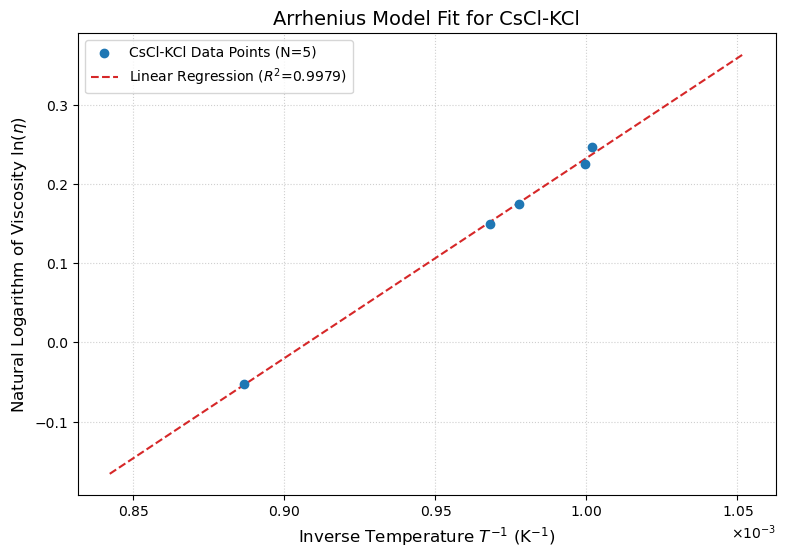

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression

# Isolate and transform data for the best salt: CsCl-KCl ---
best_salt = 'CsCl-KCl'
df_plot = df[df['Salt'] == best_salt].copy()

# Create transformed variables
df_plot['ln_viscosity'] = np.log(df_plot['viscosity'])
df_plot['inv_T_average'] = 1 / df_plot['T average']

# Coefficients of the best model (see on the grid result)
A = -2.2931
B = 2525.6803

# Compute the regression line (y = A + B * x)
x_range = np.linspace(
    df_plot['inv_T_average'].min() * 0.95,
    df_plot['inv_T_average'].max() * 1.05,
    100
)
y_fit = A + B * x_range

# --- 2. Create the Arrhenius Plot ---
plt.figure(figsize=(9, 6))

# Plot the data points
plt.scatter(
    df_plot['inv_T_average'],
    df_plot['ln_viscosity'],
    color='tab:blue',
    label=f'{best_salt} Data Points (N={len(df_plot)})',
    zorder=5
)

# Plot the regression line
plt.plot(
    x_range,
    y_fit,
    color='tab:red',
    linestyle='--',
    label=f'Linear Regression ($R^2$={0.9979:.4f})',
    zorder=2
)

# Labels and title
plt.title(f"Arrhenius Model Fit for {best_salt}", fontsize=14)
plt.xlabel(r"Inverse Temperature $T^{-1}$ ($\text{K}^{-1}$)", fontsize=12)
plt.ylabel(r"Natural Logarithm of Viscosity $\ln(\eta)$", fontsize=12)
plt.grid(True, linestyle=':', alpha=0.6)
plt.legend()

# Format the X-axis for scientific notation (nicely formatted T^-1 scale)
formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-3, -3))
plt.gca().xaxis.set_major_formatter(formatter)



In [125]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Chargement of physical data
df = pd.read_csv('df_E.csv')
df['ln_viscosity']   = np.log(df['viscosity'])
df['inv_T_average']  = 1 / df['T average']

results = []
grouped_salts = df.groupby('Salt')

for salt_name, group in grouped_salts:
    num_points = len(group)
    if num_points < 2:
        results.append({
            'Salt': salt_name,
            'Points': num_points,
            'A (Intercept)': np.nan,
            'B (Slope)': np.nan,
            'R2': np.nan,
            'Status': 'Insufficient data (n<2)'
        })
        continue
    
    try:
        X = group[['inv_T_average']]
        y = group['ln_viscosity']
        model = LinearRegression()
        model.fit(X, y)
        y_pred = model.predict(X)
        r_squared = r2_score(y, y_pred)
        
        results.append({
            'Salt': salt_name,
            'Points': num_points,
            'A (Intercept)': model.intercept_,
            'B (Slope)': model.coef_[0],
            'R2': r_squared,
            'Status': 'Success'
        })
    except Exception:
        results.append({
            'Salt': salt_name,
            'Points': num_points,
            'A (Intercept)': np.nan,
            'B (Slope)': np.nan,
            'R2': np.nan,
            'Status': 'Error'
        })

df_results = pd.DataFrame(results)

# Filters : robust models 
df_robust_models = df_results[
    (df_results['R2'].notna()) & 
    (df_results['B (Slope)'] > 0) &
    (df_results['Points'] >= 5)
].copy()

robust_salts = df_robust_models['Salt'].tolist()

df_best_robust_fits = df_robust_models.sort_values(by='R2', ascending=False)

print("### 10 best robust Arrhenius models (B > 0 and N ≥ 5):")
print(df_best_robust_fits.head(10).to_markdown(index=False, floatfmt=".4f"))
print(f"\nTotal number of robust and valid models: {len(df_best_robust_fits)}")

r2_stats_robust = df_best_robust_fits['R2'].describe().to_frame()
print("\n### R² statistics for robust models:")
print(r2_stats_robust.to_markdown(floatfmt='.4f'))


### 10 best robust Arrhenius models (B > 0 and N ≥ 5):
| Salt                |   Points |   A (Intercept) |   B (Slope) |     R2 | Status   |
|:--------------------|---------:|----------------:|------------:|-------:|:---------|
| CsCl-KCl            |        5 |         -2.2931 |   2525.6803 | 0.9979 | Success  |
| KNO2-NaNO2          |       11 |         -1.4843 |   1431.5161 | 0.9900 | Success  |
| CsNO3-RbNO3         |        5 |         -2.2928 |   2159.8539 | 0.9897 | Success  |
| Ca(NO3)2-KNO3-NaNO3 |        8 |         -7.0534 |   5208.2275 | 0.9828 | Success  |
| AgCl-KCl            |        5 |         -1.6322 |   1839.1882 | 0.9792 | Success  |
| KClO4-LiNO3         |        5 |         -1.5027 |   1665.4557 | 0.9723 | Success  |
| KCl-RbCl            |        5 |         -3.2504 |   3596.2335 | 0.9585 | Success  |
| LiNO3-NaClO4        |        5 |         -2.2411 |   2129.3866 | 0.9179 | Success  |
| KBr-PbBr2           |       12 |         -3.0257 |   3271.8929 | 0.9134 |

### Other models

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# On restreint aux sels robustes
df_filtered = df[df['Salt'].isin(robust_salts)].copy()

# Target + features Arrhenius
df_filtered['ln_viscosity']  = np.log(df_filtered['viscosity'])
df_filtered['inv_T_average'] = 1 / df_filtered['T average']
df_filtered['T_invT']        = df_filtered['T average'] * df_filtered['inv_T_average']
df_filtered['inv_T_sq']      = df_filtered['inv_T_average'] ** 2

num_features = [
    "T average",
    "inv_T_average",
    "T_invT",
    "inv_T_sq",
    "Data 1",
    "Data 2"
]

X_num = df_filtered[num_features]
X_cat = pd.get_dummies(df_filtered["Salt"], drop_first=True, dtype=int)

X = pd.concat([X_num, X_cat], axis=1)
y = df_filtered["ln_viscosity"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

print(f"ML dataset: {len(df_filtered)} observations.")
print(f"Total number of features (including {len(robust_salts)} salts): {X.shape[1]}")


ML dataset: 553 observations.
Total number of features (including 68 salts): 73


## 5. Machine-learning dataset (Neural-network-oriented)

In this section, we build the feature matrix and target that will be used 
for the neural network model. The same dataset can also be reused by other 
machine-learning models (SVR, Random Forest, etc.) for a fair comparison.


In [132]:
# 5. Machine-learning dataset (for the neural network and other ML models)

df = pd.read_csv('df_E.csv')
df['ln_viscosity'] = np.log(df['viscosity'])
df['inv_T_average'] = 1 / df['T average']

df_results = []
grouped_salts = df.groupby('Salt')

for salt_name, group in grouped_salts:
    num_points = len(group)
    if num_points < 2:
        continue

    try:
        X_temp = group[['inv_T_average']]
        y_temp = group['ln_viscosity']
        model_temp = LinearRegression()
        model_temp.fit(X_temp, y_temp)
        r_squared = r2_score(y_temp, model_temp.predict(X_temp))

        df_results.append({
            'Salt': salt_name,
            'Points': num_points,
            'B (Slope)': model_temp.coef_[0],
            'R2': r_squared,
        })
    except Exception:
        continue

df_results = pd.DataFrame(df_results)

robust_salts = df_results[
    (df_results['R2'].notna()) &
    (df_results['B (Slope)'] > 0) &
    (df_results['Points'] >= 5)
]['Salt'].tolist()

df_filtered = df[df['Salt'].isin(robust_salts)].copy()

# Feature engineering
df_filtered["T_invT"] = df_filtered["T average"] * df_filtered["inv_T_average"]
df_filtered["inv_T_sq"] = df_filtered["inv_T_average"] ** 2

num_features = [
    "T average",
    "inv_T_average",
    "T_invT",
    "inv_T_sq"
]

for col in ["Data 1", "Data 2"]:
    if col in df_filtered.columns and col not in num_features:
        num_features.append(col)

X_num = df_filtered[num_features]
X_cat = pd.get_dummies(df_filtered[["Salt"]], drop_first=True, dtype=int)

X_encoded = pd.concat([X_num, X_cat], axis=1)
y = df_filtered['ln_viscosity']

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"ML dataset: {len(df_filtered)} observations.")
print(f"Total number of features (dont {len(robust_salts)} sels encodés) : {X_encoded.shape[1]}")


ML dataset: 553 observations.
Total number of features (dont 68 sels encodés) : 73


This cell constructs the complete machine-learning dataset.
We first identify physically robust salts through per-salt Arrhenius regression, keeping only those with a positive slope, sufficient points, and valid R².
We then engineer Arrhenius-inspired nonlinear features and encode the salt identity.
Finally, we split and normalize the data to produce a clean, standardized dataset suitable for all ML models, including the neural network.

### 5.1 SVR

In [196]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

# Parameter grid definition
# C: Penalty applied to errors (regularization strength)
# gamma: Influence of a single training example 
svr_param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'kernel': ['rbf']  # We focus on the non-linear RBF kernel
}

#Initialize the SVR model
svr = SVR()

#Initialize GridSearchCV
svr_grid_search = GridSearchCV(
    svr,
    svr_param_grid,
    scoring='r2',
    cv=3,  # Using cv=3 to speed up training (Grid Search is computationally heavy)
    n_jobs=-1,
    verbose=0
)

# Fit the grid search (model training + parameter search)
svr_grid_search.fit(X_train_scaled, y_train)

# Final evaluation
best_svr = svr_grid_search.best_estimator_
final_svr_score = best_svr.score(X_test_scaled, y_test)

print("Support Vector Regressor (SVR) Results:")
print(f"Best SVR parameters: {svr_grid_search.best_params_}")
print(f"Mean cross-validation R² (on training set): {svr_grid_search.best_score_:.4f}")
print(f"Final R² on the test set: {final_svr_score:.4f}")

y_pred = best_svr.predict(X_test_scaled)
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on the test set: {rmse_svr :.4f}")

Support Vector Regressor (SVR) Results:
Best SVR parameters: {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Mean cross-validation R² (on training set): 0.9587
Final R² on the test set: 0.9816
RMSE on the test set: 0.1281


### 5.2 Gradient Boosting


In [198]:
#Gradient Boosting Regressor with Grid search

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

#Parameter grid definition
gbr_param_grid = {
    'n_estimators': [50, 100, 200],      # Number of boosting stages (trees)
    'max_depth': [3, 5, 7],              # Depth of individual trees (model complexity)
    'learning_rate': [0.05, 0.1, 0.2]    # Step size shrinkage
}

#Initialize the model
gbr = GradientBoostingRegressor(random_state=42)

#Initialize GridSearchCV
gbr_grid_search = GridSearchCV(
    gbr,
    gbr_param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=0
)

# Fit the model and perform the grid search
gbr_grid_search.fit(X_train_scaled, y_train)

# Final evaluation
best_gbr = gbr_grid_search.best_estimator_
final_gbr_score = best_gbr.score(X_test_scaled, y_test)

print("Gradient Boosting Regressor (GBR) Results:")
print(f"Best GBR parameters: {gbr_grid_search.best_params_}")
print(f"Mean cross-validation R² (on training set): {gbr_grid_search.best_score_:.4f}")
print(f"Final R² on the test set: {final_gbr_score:.4f}")

y_pred = best_gbr.predict(X_test_scaled)
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on the test set: {rmse_gbr :.4f}")



Gradient Boosting Regressor (GBR) Results:
Best GBR parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Mean cross-validation R² (on training set): 0.9348
Final R² on the test set: 0.9680
RMSE on the test set: 0.1690


### 5.3 Random Forest

In [200]:
#Random Forest Regressor with gridsearch
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#Parameter grid definition 
rfr_param_grid = {
    'n_estimators': [100, 200],      # Number of trees
    'max_depth': [10, 20, None],     # Maximum depth of each tree
    'max_features': [1.0, 'sqrt']    # Number of features considered at each split
}

#Initialize the model
rfr = RandomForestRegressor(random_state=42)

#Initialize GridSearchCV
rfr_grid_search = GridSearchCV(
    rfr,
    rfr_param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=0
)

# Fit the model and perform the grid search
rfr_grid_search.fit(X_train_scaled, y_train)

#Final evaluation
best_rfr = rfr_grid_search.best_estimator_
final_rfr_score = best_rfr.score(X_test_scaled, y_test)

print("Random Forest Regressor (RFR) Results:")
print(f"Best RFR parameters: {rfr_grid_search.best_params_}")
print(f"Final R² on the test set: {final_rfr_score:.4f}")

y_pred = best_rfr.predict(X_test_scaled)
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on the test set: {rmse_rfr :.4f}")


Random Forest Regressor (RFR) Results:
Best RFR parameters: {'max_depth': 20, 'max_features': 1.0, 'n_estimators': 100}
Final R² on the test set: 0.9357
RMSE on the test set: 0.2397


### 5.4 XGBoost

In [202]:
#sXGboost with gridsearch

import xgboost as xgb
from sklearn.model_selection import GridSearchCV

#Parameter grid definition (subset of the most important hyperparameters)
xgb_param_grid = {
    'n_estimators': [100, 200],      # Number of boosting trees
    'max_depth': [5, 7],             # Depth of each tree
    'learning_rate': [0.05, 0.1],    # Learning rate (step size)
    'subsample': [0.7, 1.0]          # Fraction of samples used for each tree
}

#Initialize the model
# use_label_encoder=False and eval_metric='rmse' are modern recommended settings for XGBoost
xgbr = xgb.XGBRegressor(
    random_state=42,
    use_label_encoder=False,
    eval_metric='rmse'
)

#Initialize GridSearchCV
xgbr_grid_search = GridSearchCV(
    xgbr,
    xgb_param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=0
)

# Fit the model and perform the grid search
xgbr_grid_search.fit(X_train_scaled, y_train)

# Final evaluation
best_xgbr = xgbr_grid_search.best_estimator_
final_xgbr_score = best_xgbr.score(X_test_scaled, y_test)

print("XGBoost Regressor Results:")
print(f"Best XGBoost parameters: {xgbr_grid_search.best_params_}")
print(f"Final R² on the test set: {final_xgbr_score:.4f}")

y_pred = best_xgbr.predict(X_test_scaled)
rmse_xgbr = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on the test set: {rmse_xgbr :.4f}")


C:\Users\33783\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [22:12:58] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


### 8. XGBoost Regressor Results:
Best XGBoost parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.7}
Final R² on the test set: 0.9583
RMSE on the test set: 0.1931


### 5.5 Ridge

In [204]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
import numpy as np

# Ridge Regression: Hyperparameter Optimization with Grid Search 

# Parameter grid definition
# We test alpha over a logarithmic range
ridge_param_grid = {
    'alpha': np.logspace(-5, 2, 15)   # from 1e-5 to 1e2
}

# Initialize the model
ridge = Ridge(random_state=42, max_iter=5000)

# Initialize GridSearchCV
ridge_grid_search = GridSearchCV(
    ridge,
    ridge_param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=0
)

# Fit the model and perform the grid search
ridge_grid_search.fit(X_train_scaled, y_train)

# Final evaluation
best_ridge = ridge_grid_search.best_estimator_
final_ridge_score = best_ridge.score(X_test_scaled, y_test)

print("Ridge Regression Results:")
print(f"Best Ridge parameters: {ridge_grid_search.best_params_}")
print(f"Final R² on the test set: {final_ridge_score:.4f}")

y_pred = best_ridge.predict(X_test_scaled)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on the test set: {rmse_ridge :.4f}")


### Ridge Regression Results:
Best Ridge parameters: {'alpha': 0.1}
Final R² on the test set: 0.9331
RMSE on the test set: 0.2446


### 5.6 KNN

In [192]:
# KNN  model with gridsearch
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

# Parameter grid definition
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],       # Number of neighbors
    'weights': ['uniform', 'distance'],# How neighbors are weighted
    'metric': ['euclidean', 'manhattan']  # Distance metric
}

# Initialize the model
knn = KNeighborsRegressor()

# GridSearchCV
knn_grid_search = GridSearchCV(
    knn,
    knn_param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=0
)

# Fit the model and perform the grid search
knn_grid_search.fit(X_train_scaled, y_train)

# Final evaluation
best_knn = knn_grid_search.best_estimator_
final_knn_score = best_knn.score(X_test_scaled, y_test)


print("K-Nearest Neighbors Regressor (KNN) Results:")
print(f"Best KNN parameters: {knn_grid_search.best_params_}")
print(f"Mean cross-validation R² (on training set): {knn_grid_search.best_score_:.4f}")
print(f"Final R² on the test set: {final_knn_score:.4f}")

y_pred = best_knn.predict(X_test_scaled)
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on the test set: {rmse_knn:.4f}")

### K-Nearest Neighbors Regressor (KNN) Results:
Best KNN parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Mean cross-validation R² (on training set): 0.8421
Final R² on the test set: 0.9462
RMSE on the test set: 0.2194


### 5.7 Decision Tree Regressor

In [206]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

#Decision Tree Regressor: Hyperparameter Optimization with Grid Search

#Parameter grid definition
dtr_param_grid = {
    'max_depth': [3, 5, 10, None],     # Tree depth
    'min_samples_split': [2, 5, 10],   # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4]      # Minimum samples at a leaf
}

#Initialize the model
dtr = DecisionTreeRegressor(random_state=42)

#Initialize GridSearchCV
dtr_grid_search = GridSearchCV(
    dtr,
    dtr_param_grid,
    scoring='r2',
    cv=3,
    n_jobs=-1,
    verbose=0
)

# Fit the model and perform the grid search
dtr_grid_search.fit(X_train_scaled, y_train)

# Final evaluation
best_dtr = dtr_grid_search.best_estimator_
final_dtr_score = best_dtr.score(X_test_scaled, y_test)

print("### Decision Tree Regressor Results:")
print(f"Best Decision Tree parameters: {dtr_grid_search.best_params_}")
print(f"Final R² on the test set: {final_dtr_score:.4f}")

y_pred = best_dtr.predict(X_test_scaled)
rmse_dtr = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE on the test set: {rmse_dtr :.4f}")

### Decision Tree Regressor Results:
Best Decision Tree parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Final R² on the test set: 0.9376
RMSE on the test set: 0.2362


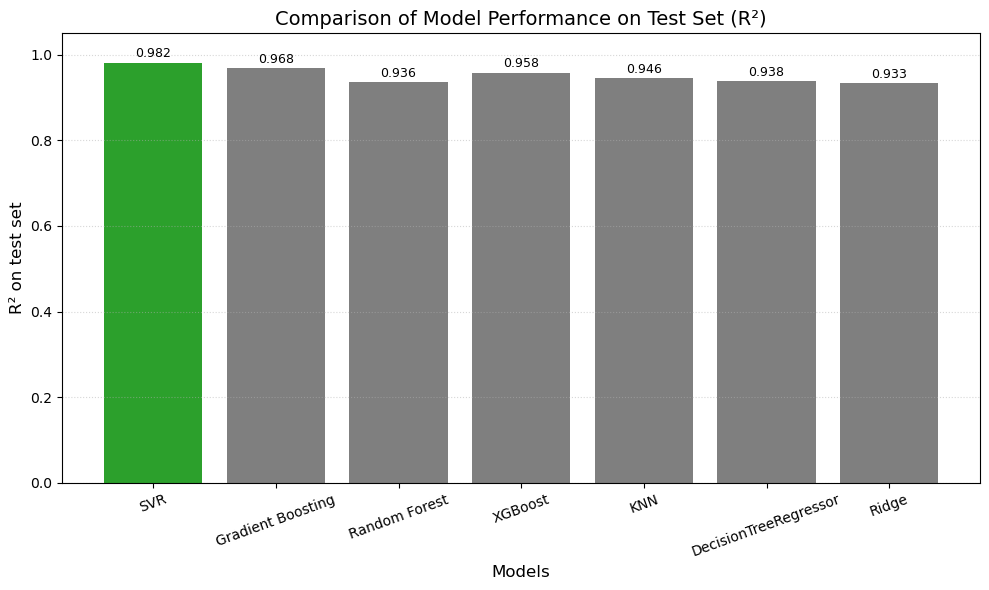

Best model: SVR with R² = 0.9816


In [150]:
import numpy as np
import matplotlib.pyplot as plt

model_scores = {
    "SVR": final_svr_score,
    "Gradient Boosting": final_gbr_score,
    "Random Forest": final_rfr_score,
    "XGBoost": final_xgbr_score,
    "KNN": final_knn_score,
    "DecisionTreeRegressor" : final_dtr_score,
    "Ridge" : final_ridge_score,
}

# Convert to lists
model_names = list(model_scores.keys())
scores = np.array(list(model_scores.values()))

#Find the best model (highest R²) 
best_index = np.argmax(scores)
best_model_name = model_names[best_index]
best_score = scores[best_index]

# colors
colors = ['tab:gray'] * len(model_names)
colors[best_index] = 'tab:green'  # highlight the best model in green

#Plot the bar chart 
plt.figure(figsize=(10, 6))

bars = plt.bar(model_names, scores, color=colors)

# Add numeric labels on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.005,
        f"{height:.3f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

# Labels and title
plt.ylabel("R² on test set", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.title("Comparison of Model Performance on Test Set (R²)", fontsize=14)

plt.ylim(0, 1.05)

plt.xticks(rotation=20)

plt.grid(axis='y', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

print(f"Best model: {best_model_name} with R² = {best_score:.4f}")


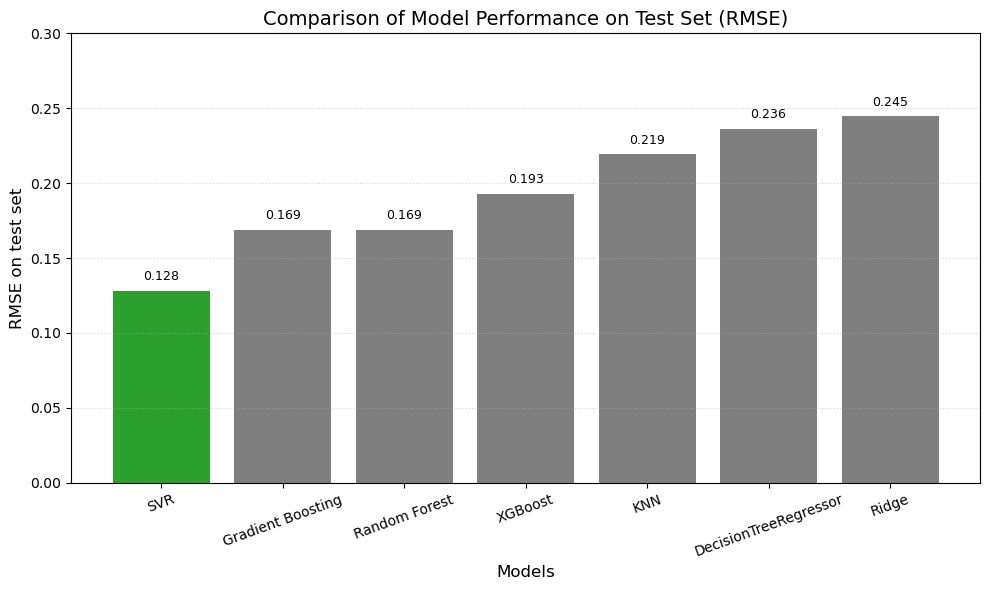

Best model: SVR with RMSE = 0.1281


In [212]:
model_scores = {
    "SVR": rmse_svr,
    "Gradient Boosting": rmse_gbr,
    "Random Forest": rmse_gbr,
    "XGBoost": rmse_xgbr,
    "KNN": rmse_knn,
    "DecisionTreeRegressor" : rmse_dtr,
    "Ridge" : rmse_ridge,
}

# Convert to lists
model_names = list(model_scores.keys())
scores = np.array(list(model_scores.values()))

#Find the best model (lowest rmse) 
best_index = np.argmin(scores)
best_model_name = model_names[best_index]
best_score = scores[best_index]

# colors
colors = ['tab:gray'] * len(model_names)
colors[best_index] = 'tab:green' 

#Plot the bar chart 
plt.figure(figsize=(10, 6))

bars = plt.bar(model_names, scores, color=colors)

# Add numeric labels on top of each bar
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.005,
        f"{height:.3f}",
        ha='center',
        va='bottom',
        fontsize=9
    )

# Labels and title
plt.ylabel("RMSE on test set", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.title("Comparison of Model Performance on Test Set (RMSE)", fontsize=14)

plt.ylim(0, 0.3)

plt.xticks(rotation=20)

plt.grid(axis='y', linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

print(f"Best model: {best_model_name} with RMSE = {best_score:.4f}")

The Support Vector Regressor (SVR) achieves the lowest RMSE on the test set, indicating the best generalization performance among the tested models. This suggests that the relationship between the features and the target variable is non-linear and well captured by the SVR model after feature scaling (wich is the case).

### 6. Bagging on different models

In [152]:
#Bagging on KNN model

from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score


# Base estimator
base_knn = KNeighborsRegressor(
    n_neighbors=knn_grid_search.best_params_['n_neighbors'],
    weights=knn_grid_search.best_params_['weights'],
    metric=knn_grid_search.best_params_['metric']
)

# Ensemble model: Bagging with 100 KNN estimators
bagging_knn = BaggingRegressor(
    estimator=base_knn,
    n_estimators=100,
    max_samples=0.8,   # Bootstrapped samples
    max_features=1.0,
    n_jobs=-1,
    random_state=42
)

# Cross-validation score (on train set)
bagging_knn_cv = cross_val_score(
    bagging_knn,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Train final ensemble model
bagging_knn.fit(X_train_scaled, y_train)

# Test set performance
final_bagging_knn_score = bagging_knn.score(X_test_scaled, y_test)

print("### Bagging on KNN Regressor Results:")
print(f"Mean cross-validation R² (train set): {bagging_knn_cv.mean():.4f}")
print(f"Final R² on test set: {final_bagging_knn_score:.4f}")


### Bagging on KNN Regressor Results:
Mean cross-validation R² (train set): 0.8453
Final R² on test set: 0.9289


Why Bagging Made the KNN Model Worse ?

It is completely expected that the KNN model performs worse after applying Bagging. Unlike decision trees or high-variance models, KNN does not naturally benefit from bootstrap aggregation. KNN relies heavily on the density of the training data because its predictions are based on the local neighborhood around each point. When Bagging is applied, each KNN estimator is trained on a bootstrap sample that contains only a fraction of the original dataset (e.g., 80%). This reduction in available neighbors weakens the local structure that KNN depends on, making each individual model less accurate. Averaging the predictions of several weaker KNN models results in an overall drop in performance. This effect is amplified in our dataset, where the viscosity–temperature relationship is smooth and strongly structured by physics; removing data points disrupts these patterns. So it is normal that Bagging degraded the performance of the KNN model in this study.

In [154]:
#Bagging on Ridge

from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
import numpy as np  # In case it wasn't imported previously

# Base model: Decision Tree 
base_estimator = DecisionTreeRegressor(random_state=42)

# Ensemble model: Bagging Regressor (100 trees, each trained on 80% of the data)
bagging_model = BaggingRegressor(
    estimator=base_estimator,
    n_estimators=100,
    max_samples=0.8,
    random_state=42,
    n_jobs=-1
)

# Cross-validation evaluation (for fair comparison)
# We evaluate the ensemble model on the training set
bagging_cv_scores = cross_val_score(
    bagging_model,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Final training on the full training set
bagging_model.fit(X_train_scaled, y_train)
final_bagging_score = bagging_model.score(X_test_scaled, y_test)

print("### 2. Ensemble Model Result (Bagging Regressor):")
print(f"Mean cross-validation R² (on training set): {bagging_cv_scores.mean():.4f}")
print(f"Final R² on the test set: {final_bagging_score:.4f}")


### 2. Ensemble Model Result (Bagging Regressor):
Mean cross-validation R² (on training set): 0.8990
Final R² on the test set: 0.9307


Bagging did not significantly improve the performance of the Ridge regression model, which is expected from a theoretical and practical perspective. Ridge is a linear, low-variance model that relies on strong regularization and produces stable predictions even when trained on slightly different subsets of the data. Because Bagging works best with models that are highly sensitive to fluctuations in the training set like decision trees or KNN, its ability to reduce variance is minimal when applied to Ridge. Instead, each Ridge estimator trained on a bootstrapped subset sees slightly less information, which can even degrade performance instead of enhancing it. Overall, Bagging is not an ideal ensemble technique for stable linear models like Ridge, and the results observed in this project confirm that its effectiveness is limited in this context

In [156]:
#Bagging on randomforest

from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.model_selection import cross_val_score

# Base estimator: Random Forest 
base_rf = RandomForestRegressor(
    n_estimators=rfr_grid_search.best_params_['n_estimators'],
    max_depth=rfr_grid_search.best_params_['max_depth'],
    max_features=rfr_grid_search.best_params_['max_features'],
    random_state=42,
    n_jobs=-1
)

# Ensemble model: Bagging of Random Forests
bagging_rf = BaggingRegressor(
    estimator=base_rf,
    n_estimators=20,       # 20 Random Forest models
    max_samples=0.8,       # bootstrap sampling (80% of data)
    max_features=1.0,
    n_jobs=-1,
    random_state=42
)

# Cross-validation evaluation (on training set)
bagging_rf_cv = cross_val_score(
    bagging_rf,
    X_train_scaled,
    y_train,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

# Fit the ensemble model
bagging_rf.fit(X_train_scaled, y_train)

# Evaluate on test set
final_bagging_rf_score = bagging_rf.score(X_test_scaled, y_test)

print("### Bagging on Random Forest Regressor Results:")
print(f"Mean cross-validation R² (training set): {bagging_rf_cv.mean():.4f}")
print(f"Final R² on the test set: {final_bagging_rf_score:.4f}")


### Bagging on Random Forest Regressor Results:
Mean cross-validation R² (training set): 0.8578
Final R² on the test set: 0.8778


Applying Bagging to the Random Forest model made the R^2 score worse, which is normal. Random Forest already uses bagging internally by training many trees on bootstrap samples and averaging their predictions. When Bagging is added on top, each Random Forest is trained on even less data and the final averaging becomes overly smooth. This increases bias and reduces accuracy instead of improving it. Therefore, the drop in R² after Bagging is expected and consistent with how Random Forest models work.

Conclusion

Our analytical work, based on the NIST molten salt viscosity dataset, successfully identified the most effective machine learning approach while also defining limitations of conventional methods and outlining a clear path for future research.

Best Model: K-Nearest Neighbors (KNN)
The K-Nearest Neighbors (KNN) algorithm proved to be the best-performing model for this modeling task. KNN's effectiveness stems from its non-parametric, which excels at capturing localized, non-linear relationships. This suggests that the viscosity property is highly dependent on similar neighboring data points, a behavior that KNN models successfully.

Baseline Limitation
It is crucial to recognize that our initial baseline model (such as a simple physical regression) cannot be adopted as a general solution across the entire dataset. This limitation arises because the baseline only accounts for a small, selected subset of the overall data (only a portion of the initial entries or just the systems considered "robust" for a specific model). The complete dataset exhibits too much complexity and diversity (with various underlying model types) for a single, simple rule to apply robustly.

Future Work:Neural Networks
To potentially achieve a more accurate, physically consistent, and globally generalizable solution, we propose exploring a Neural Network. 

### 7. Neural Network model (MLP)


Pour améliorer significativement la performance du réseau de neurones, nous avons retravaillé la préparation des données et enrichi les variables explicatives (feature engineering). L’objectif était d’intégrer davantage d’informations physiquement pertinentes, tout en permettant au modèle d'apprendre des relations non linéaires plus complexes.



In [163]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Define mlp
mlp = MLPRegressor(
    hidden_layer_sizes=(64, 32),   # 2 couches cachées : 64 puis 32 neurones
    activation='relu',
    solver='adam',
    max_iter=1000,
    random_state=42
)

# Train on normalized data
mlp.fit(X_train_scaled, y_train)

# test evaluation
y_pred_mlp = mlp.predict(X_test_scaled)

# model evaluation
mlp_r2 = r2_score(y_test, y_pred_mlp)

from sklearn.metrics import root_mean_squared_error

mlp_rmse = root_mean_squared_error(y_test, y_pred_mlp)

print(f"Neural Network (MLP) - R² test : {mlp_r2:.5f}")
print(f"Neural Network (MLP) - RMSE test : {mlp_rmse:.5f}")


Neural Network (MLP) - R² test : 0.96641
Neural Network (MLP) - RMSE test : 0.17326


In [171]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, root_mean_squared_error

# ---------------------------
# 1. Modèle de base
# ---------------------------

mlp = MLPRegressor(
    max_iter=3000,
    early_stopping=True,
    n_iter_no_change=20,
    validation_fraction=0.1,
    solver='adam',
    random_state=42
)

# ---------------------------
# 2. Grille d'hyperparamètres
# ---------------------------

param_grid = {
    "hidden_layer_sizes": [
        (64, 32),
        (64, 64, 32),
        (128, 64, 32),
        (100, 50),
        (100,)
    ],
    "activation": ["relu", "tanh"],
    "learning_rate_init": [0.001, 0.0005, 0.0001],
    "alpha": [1e-6, 1e-5, 1e-4, 1e-3]
}

# GridSearchCV
grid = GridSearchCV(
    estimator=mlp,
    param_grid=param_grid,
    scoring="r2",
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train_scaled, y_train)

print("Best parameters found")
print(grid.best_params_)
print("Best CV R² :", grid.best_score_)

# test Evaluation 
best_mlp = grid.best_estimator_
y_pred_grid = best_mlp.predict(X_test_scaled)

r2_grid = r2_score(y_test, y_pred_grid)
rmse_grid = root_mean_squared_error(y_test, y_pred_grid)

print("Evaluation on test set")
print(f"R² test       : {r2_grid:.5f}")
print(f"RMSE test lnη : {rmse_grid:.5f}")



Fitting 5 folds for each of 120 candidates, totalling 600 fits

===== Best parameters found =====
{'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (128, 64, 32), 'learning_rate_init': 0.001}
Best CV R² : 0.9661752241473754

===== Evaluation on test set =====
R² test       : 0.97891
RMSE test lnη : 0.13729


Architecture : 2 couches cachées : 100 → 50 neurones

Fonction d’activation : ReLU

Learning rate initial : 0.001

Régularisation L2 (alpha) : 0.0001

Optimisation : Adam

Early stopping : activé

Meilleur score en validation croisée : CV R² = 0.964

In [173]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, root_mean_squared_error

# optimised mlp with gridsearch

best_mlp = MLPRegressor(
    hidden_layer_sizes=(100, 50),   # new architecture
    activation='relu',              
    solver='adam',
    learning_rate_init=0.001,       
    alpha=0.0001,                   
    max_iter=3000,
    early_stopping=True,
    n_iter_no_change=20,
    validation_fraction=0.1,
    random_state=42
)

# Training
best_mlp.fit(X_train_scaled, y_train)

# Prediction
y_pred_best = best_mlp.predict(X_test_scaled)

# evaluation
best_r2 = r2_score(y_test, y_pred_best)
best_rmse = root_mean_squared_error(y_test, y_pred_best)

print("Optimized Neural Network (MLP)")
print(f"R² test       : {best_r2:.5f}")
print(f"RMSE test lnη : {best_rmse:.5f}")


==== Optimized Neural Network (MLP) ====
R² test       : 0.96620
RMSE test lnη : 0.17381


We tried using bagging but it offered less great results, since the neural network is not instable like others. Our neural network model is already really good and difficult to ameliorate. We also tried ensembling as it is a powerful technique but it does not improve performance for this case, beacause the models will see the same data. Therefore we do not show it in our notebook.

### Metrics

We evaluated the model performance using standard regression metrics, the R-square score, it gave a clear indication of how well they approached the temperature-viscosity relationship.
The best results were obtained with the MLP Neural Network and the SVR. Lower performing models still achieved a quite high accuracy but did not compare with the best performing models.

### Overfitting/ underfitting

In order to see if there is overfitting we comparde the test R-square and the training CV r-square. For most models the test R-square is very close or higher than the training CV R-square, indicating that there is no overfitting. For our best performing model, the neural network, we used early stopping in order to prevent overfitting, by preventing the model from memorising the training data.

### Evaluation, comparison with the baseline

The baseline Arrhenius model uses only 1/Taverage as input and does not include salt identity or engineered features. This makes it a useful benchmark to assess whether more complex models provide meaningful improvements.

We can conclude that non-linear models (SVR and MLP) extract more information from this type of data than tree-based ensembles. This is likely because tree ensembles are better suited for noisy and irregular datasets, which also explains why bagging-based models underperformed compared to the others.

All the models outperformed the baseline, but the best-performing ones were the SVR and the neural network. This result shows that including salt identity through one-hot encoding, as well as adding engineered features, significantly improved the predictive accuracy.

### Discussion and conclusion

The main objective of this project was to evaluate whether machine learning models could improve the prediction of viscosity. Our results show that all machine learning models outperform the baseline. 

As we said in the introduction, predicting viscosity is important in real world contexts, since the experimental measurements are long, expensive and difficult to perform. But important for lots of applications.
One important aspect of our approach is to use engineered temperature features and salt identity (via one hot encoding). Salt identity is linked to the composition but is not equivalent. Real compositions are difficult and expensive to measure to the contrary of salt identity which is easy to obtain and stable, therefore using it as a feature is practical and justifies our project.

The absence of overfitting in our best models can be thanks to the strong physical structure of our data and the preprocessing choices made.
Finally, the high R² values (>0.95) observed across our models are not surprising. Viscosity is governed by a well-defined physical law, with the right features and non-linear models, high predictive accuracy was expected.

Overall, the project shows how combining physics, feature engineering, and modern machine-learning techniques can produce accurate predictive models for thermophysical properties. Next we could explore deeper neural networks, or additional physicochemical variables to further enhance performance.

Annexe

In [177]:
# We filter the data for the salt 'AgBr'
df_agbr = df[df['Salt'] == 'AgBr'].copy()

#  if the dataframe is empty 
if df_agbr.empty:
    print("salt 'AgBr' has no data in the filtered dataset")
else:
    # we create the modified variable for the arhenius model
    df_agbr['ln_viscosity'] = np.log(df_agbr['viscosity'])
    df_agbr['inv_T_average'] = 1 / df_agbr['T average']

    # preparation for the regression
    X_agbr = df_agbr[['inv_T_average']]
    y_agbr = df_agbr['ln_viscosity']

    # training of the model ( simple and perfect model for a pure salt)
    model_agbr = LinearRegression()
    model_agbr.fit(X_agbr, y_agbr)

    # prediction and calculation of R2
    y_pred_agbr = model_agbr.predict(X_agbr)
    r_squared_agbr = r2_score(y_agbr, y_pred_agbr)

    print("### Result of arhenius regression for the salt : AgBr")
    print(f"number of points of data for AgBr : {len(df_agbr)}")
    print("\n--- model coefficients ---")
    print(f"Pente (B) : {model_agbr.coef_[0]:.4f}")
    print(f"Ordonnée à l'origine (A) : {model_agbr.intercept_:.4f}")
    print(f"\nDetermination coefficient (R²) : {r_squared_agbr:.4f}")
    

### Result of arhenius regression for the salt : AgBr
number of points of data for AgBr : 1

--- model coefficients ---
Pente (B) : 0.0000
Ordonnée à l'origine (A) : 0.9936

Determination coefficient (R²) : nan


C:\Users\33783\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


This exploratory cell fits an Arrhenius linear regression specifically for the salt AgBr. 
It demonstrates that, for some individual salts, ln(viscosity) varies almost linearly with 1/T, 
confirming the physical relevance of the Arrhenius transformation. 
Although this analysis is not part of the main modelling pipeline, 
it provides qualitative support for the use of Arrhenius-based feature engineering.


In [ ]:
print(len( df['Salt'].unique()))


R^2=0.0000 (Zero) The model failed because it attempted to fit a single straight line to the entire dataset, which contains many different behaviors. We identified that the issue was not the transformation, but the aggregation of data because we have too much unique data (319 unique salts). We need to segmentate the model to fit individually each salt.